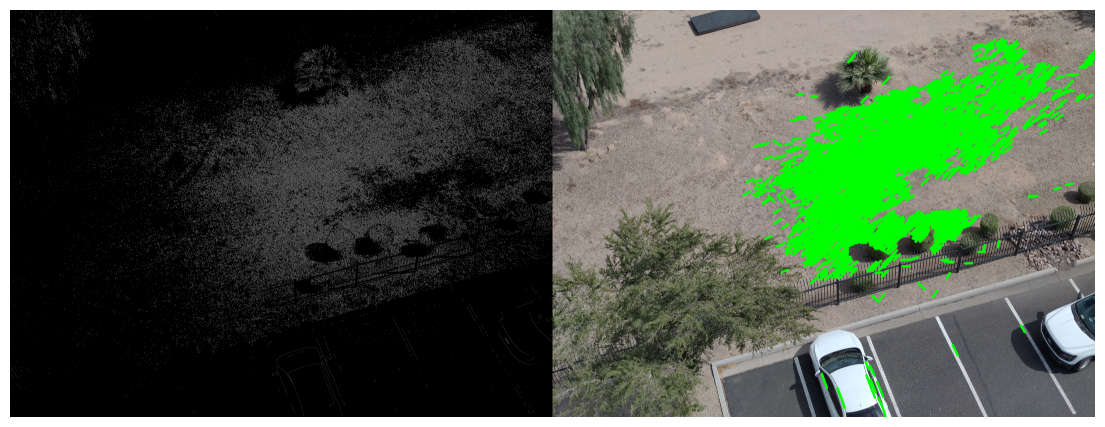

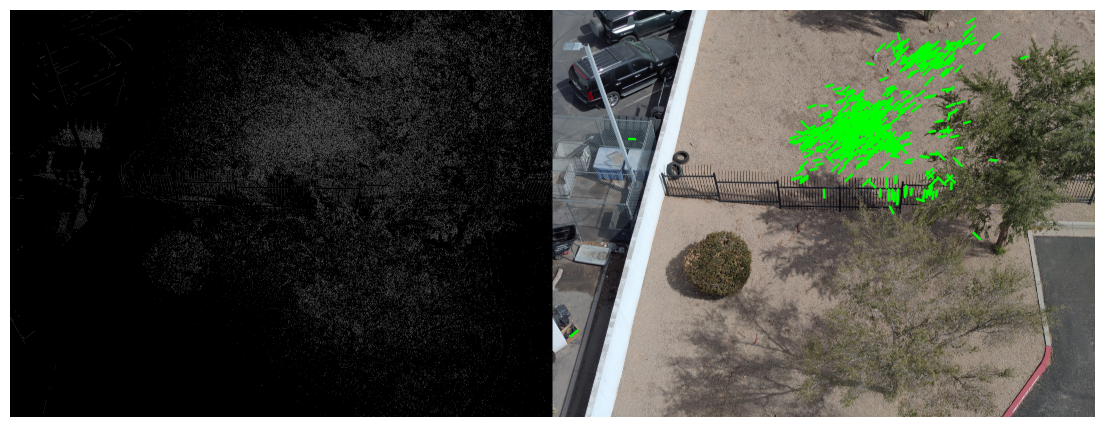

<Figure size 1400x600 with 0 Axes>

In [655]:
import os
import cv2
import numpy
import matplotlib.pyplot as plt

image_folder = 'input'
plt.rcParams['figure.figsize'] = 14, 6

for image_name in os.listdir(image_folder):
    bgr = cv2.imread(os.path.join(image_folder, image_name))
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 200, 400, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, numpy.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(rgb, (x1, y1), (x2, y2), (0, 255, 0), 40)
    
    plt.axis('off')
    grayscale_as_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    plt.imshow(numpy.concatenate((grayscale_as_rgb, rgb), axis=1))
    plt.figure()

Time Taken: 1 Seconds


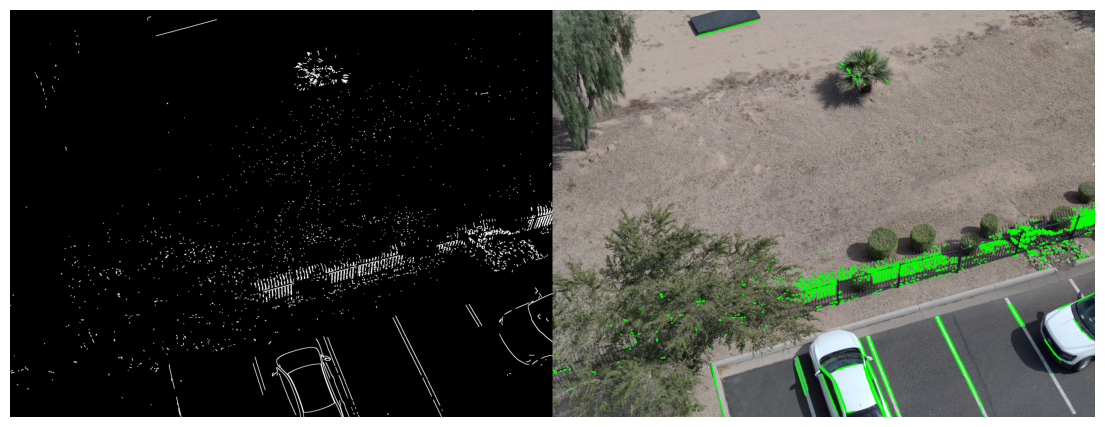

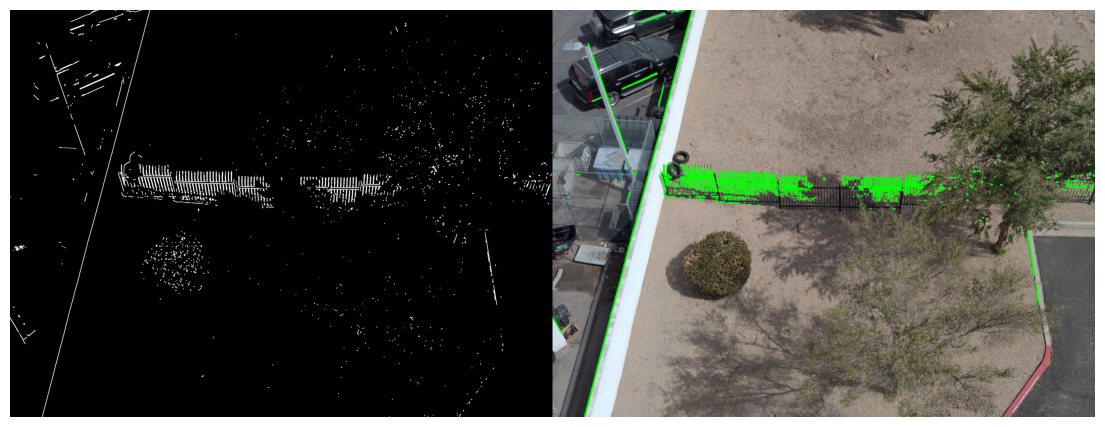

<Figure size 1400x600 with 0 Axes>

In [631]:
import os
import cv2
import time
import numpy
import matplotlib.pyplot as plt

image_folder = 'input'

dilation = 3
new_image_height = 2000

start_time = time.time()
plt.rcParams['figure.figsize'] = 14, 6

for image_name in os.listdir(image_folder):
    bgr_image = cv2.imread(os.path.join(image_folder, image_name))
    image_height, image_width, _ = bgr_image.shape
    rescale_factor = image_height/new_image_height
    resized_bgr = cv2.resize(bgr_image, (int(image_width/rescale_factor), int(image_height/rescale_factor)))
    rgb = cv2.cvtColor(resized_bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(resized_bgr, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 330, 430, apertureSize=3, L2gradient = True)
    edges = cv2.dilate(edges, numpy.ones((dilation, dilation)))
    lines = cv2.HoughLinesP(edges, 1, numpy.pi/180, threshold=140, minLineLength=2, maxLineGap=0)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(rgb, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
    plt.axis('off')
    grayscale_as_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    plt.imshow(numpy.concatenate((grayscale_as_rgb, rgb), axis=1))
    plt.figure()

print('Time Taken: ' + str(round(time.time() - start_time)) + " Seconds")